# **1. Import Library**

- **Nama:** Althaf Yudhistira
- **Email:** althafbanfsaj@gmail.com
- **ID Dicoding:** althafby

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [23]:
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [24]:
df = pd.read_csv('D:/project_ml_dicoding/classify.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   voted_up           3000 non-null   int64  
 1   playtime_recorded  3000 non-null   float64
 2   playtime_last_2W   3000 non-null   float64
 3   has_engagement     3000 non-null   int64  
 4   cluster            3000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 117.3 KB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [25]:
X = df.drop('cluster', axis=1)
y = df['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   voted_up           3000 non-null   int64  
 1   playtime_recorded  3000 non-null   float64
 2   playtime_last_2W   3000 non-null   float64
 3   has_engagement     3000 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 93.9 KB


In [27]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3000 entries, 0 to 2999
Series name: cluster
Non-Null Count  Dtype
--------------  -----
3000 non-null   int64
dtypes: int64(1)
memory usage: 23.6 KB


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:

logreg = LogisticRegression(
    multi_class='multinomial',  
    solver='lbfgs',             
    max_iter=1000,              
    random_state=42
)

#
logreg.fit(X_train, y_train)

c:\Users\Emesi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [30]:
y_pred = knn.predict(X_test)

report = classification_report(y_test, y_pred, zero_division=0)  
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00       293
           3       1.00      1.00      1.00        77

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



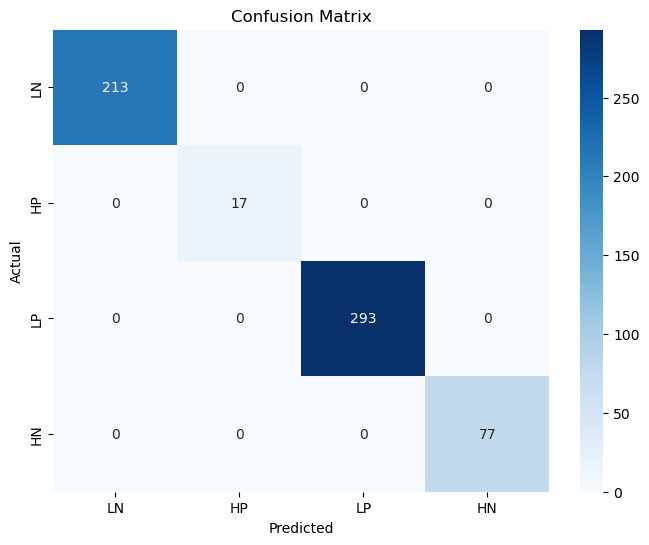

In [46]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['LN', 'HP','LP','HN'],  # Update with your class names
            yticklabels=['LN', 'HP','LP','HN'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
y_pred_logreg = logreg.predict(X_test)


report_logreg = classification_report(y_test, y_pred_logreg, zero_division=0)
print("Logistic Regression Performance:\n", report_logreg)

Logistic Regression Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00       293
           3       1.00      1.00      1.00        77

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Pada Data Dota 2 game reveiw ini penggunaan KNN lebih efektif dibanding dengan Logistic regression terbukti dengan akurasi KNN yang jauh lebih unggul dengan akurasi bernilai 100% dan F1 score hampir sempurna dengan nilai 99%,recall sebesar 99% dan presisi sebesar 99%,  sedangkan logistic hanya mencapai akurasi sebesar 98%, f1 score sebesar 88%, recall sebesar 88%, dan presisi sebesar 88%

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 11,13]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print(f"Best K: {grid_search.best_params_}")

Best K: {'n_neighbors': 3}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [34]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
report = classification_report(y_test, y_pred, zero_division=0)  
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00       293
           3       1.00      1.00      1.00        77

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Model sudah optimal sebelum adanya optimaasi